In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

C:\Users\000460612\AppData\Local\Temp\ipykernel_21004\2017857423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
iris_dataset = pd.read_csv("iris.csv")
print(iris_dataset.shape)

(150, 5)


In [4]:
print(iris_dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


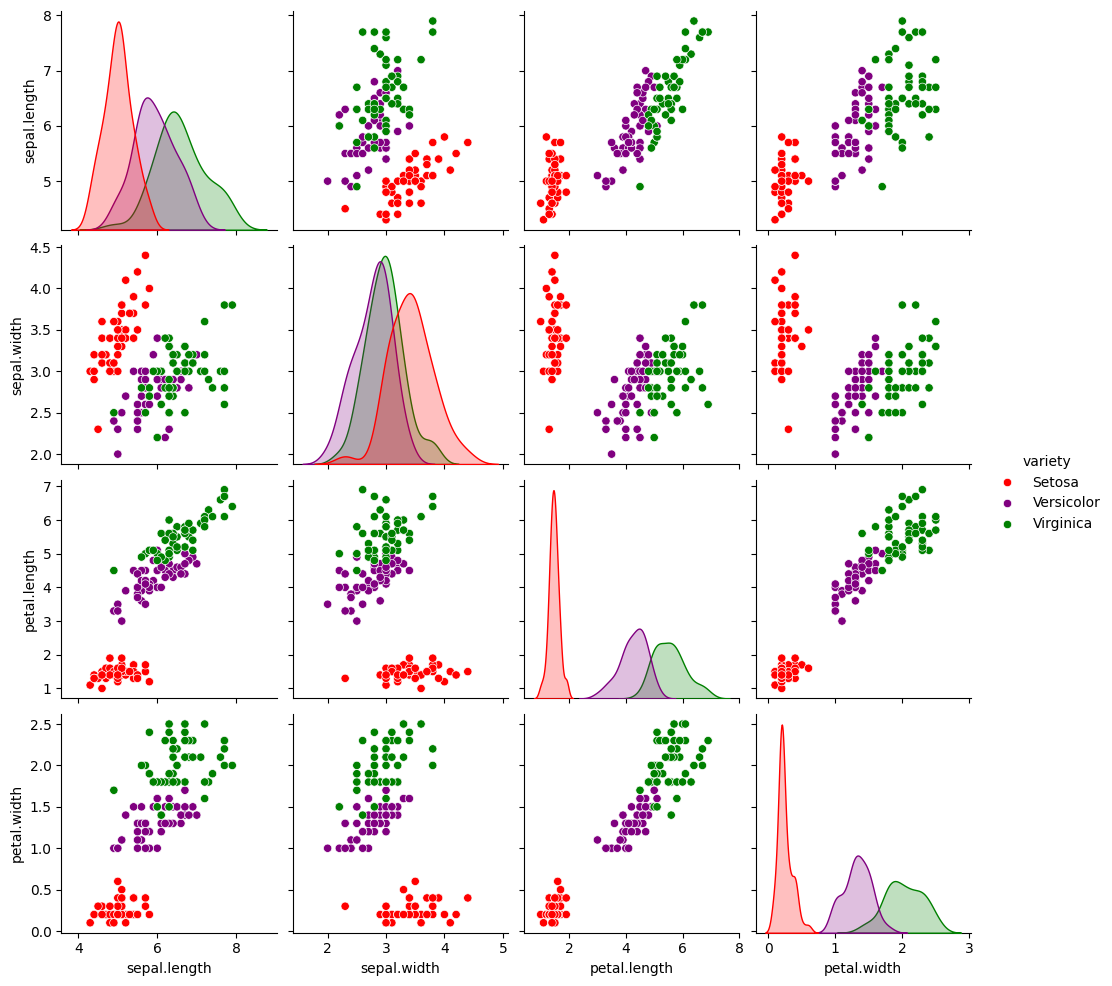

In [5]:
iris_columns = iris_dataset[['sepal.length', 
                             'sepal.width', 
                             'petal.length', 
                             'petal.width', 
                             'variety']]
iris_colours = {'Setosa' : 'red', 
                'Versicolor' : 'purple', 
                'Virginica' : 'green'}

# hue specifies which column you want to change colours of, then palette makes it possible to change colours using like a dictionary
sns.pairplot(iris_columns, hue='variety', palette=iris_colours)

plt.show()

In [14]:
# split dataset
X = iris_dataset.iloc[:, 0:3]
y = iris_dataset.iloc[:, 4]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, random_state=0, test_size=0.3)  # 70% for training, 30% for temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, random_state=0, test_size=0.33)  # 20% for testing, 10% for validation


In [15]:
# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (105, 3)
Testing set shape: (30, 3)
Validation set shape: (15, 3)


In [8]:
# Define a range of values for n_neighbors
k_values = range(1, 21)

In [9]:
# Initialize variables to store results
best_k = None
best_accuracy = 0.0

In [17]:
# Loop through different values of k
for k in k_values:
    # Initialize K-NN classifier with the current value of k
    classifier = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = classifier.predict(X_val)
    
    # Calculate accuracy for the current value of k
    accuracy = accuracy_score(y_val, y_pred)
    
    # Check if the current k gives a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

In [18]:
# Print the best k and its corresponding accuracy
print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

Best k: 1
Best Accuracy: 0.9333333333333333
